<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


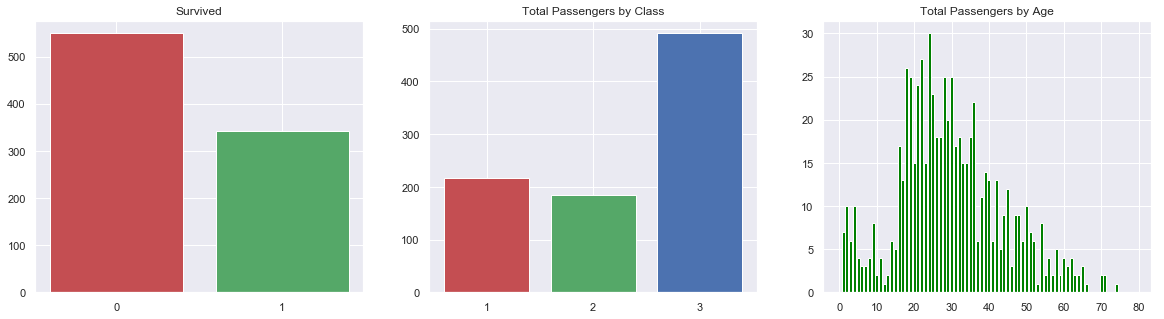

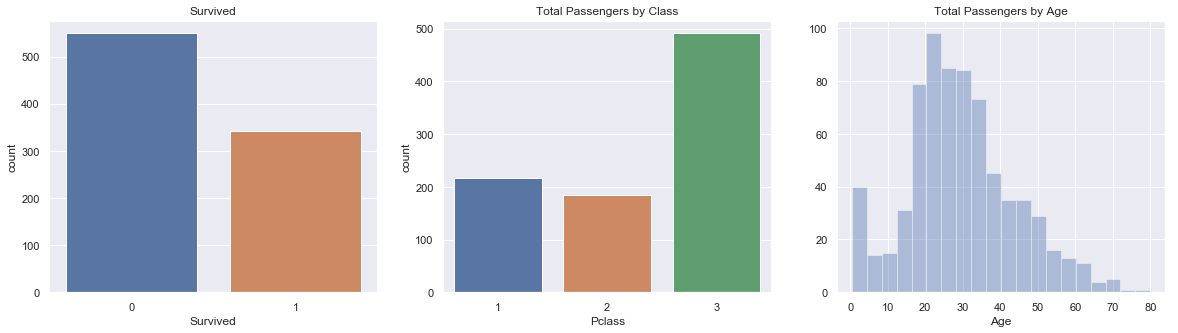

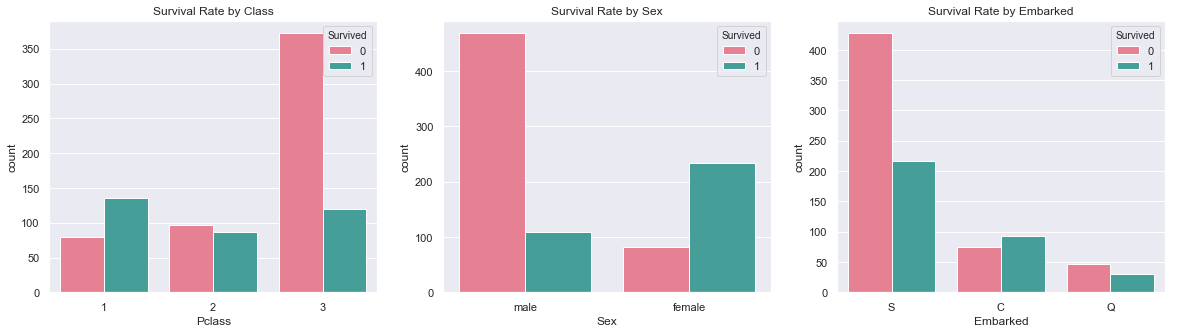

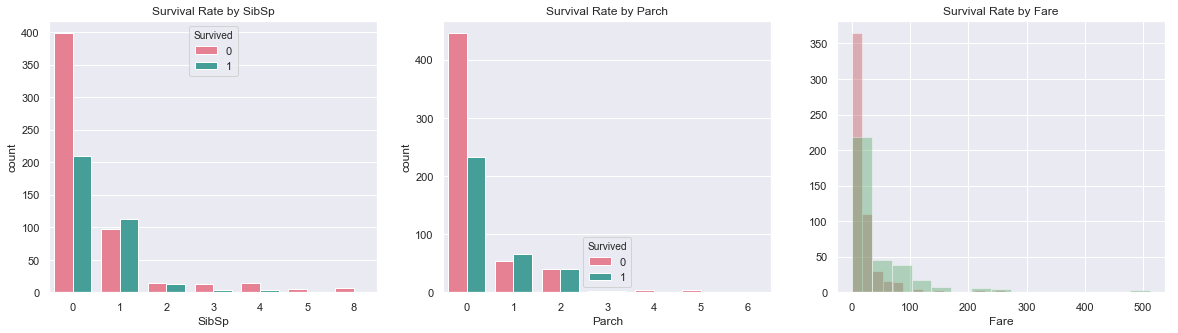

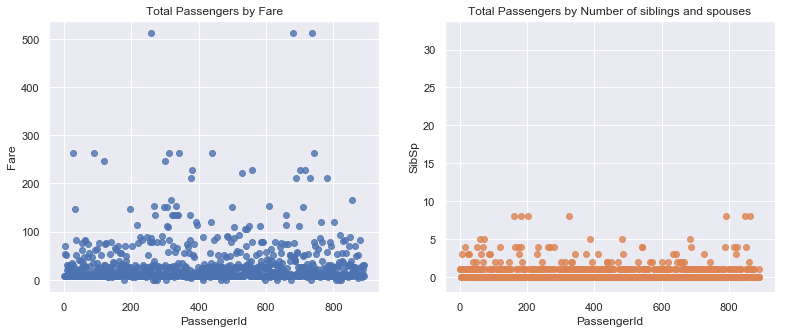

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64
------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


C:\Users\62490\Anaconda3\envs\Hands on Machine Learnen\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


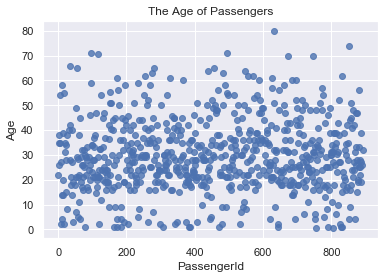

median    14.4542


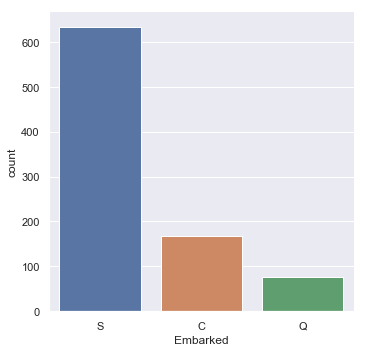

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool
------------------------------
PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool


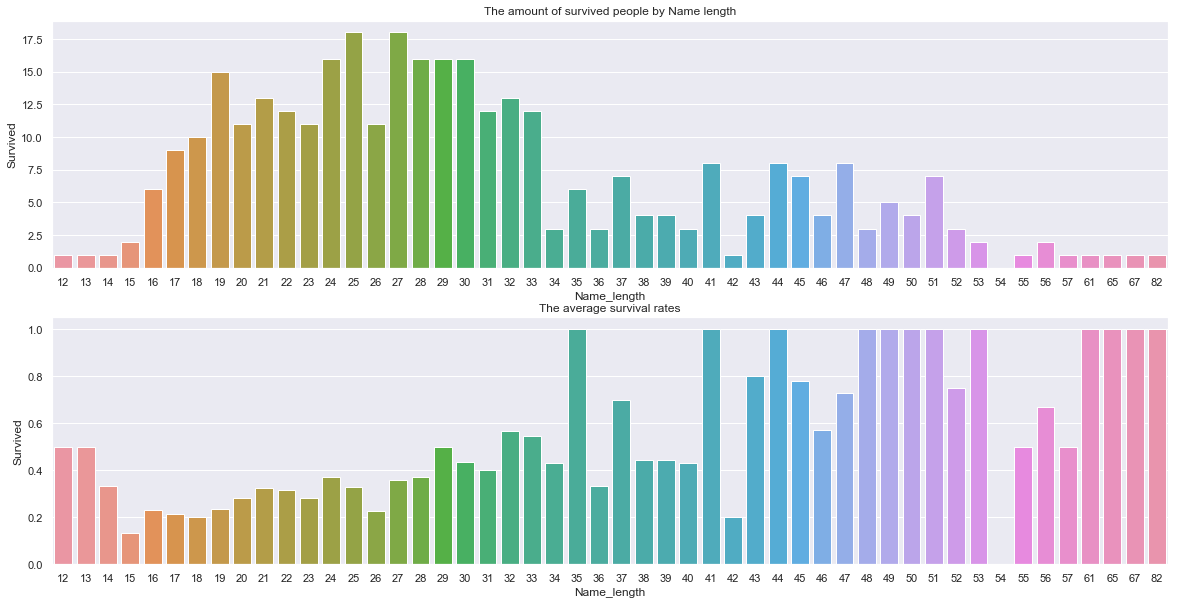

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Name_length      0
Age_bin          0
Fare_log         0
Fare_bin         0
dtype: int64
------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Name_length      0
Age_bin          0
Fare_log         0
Fare_bin         0
dtype: int64


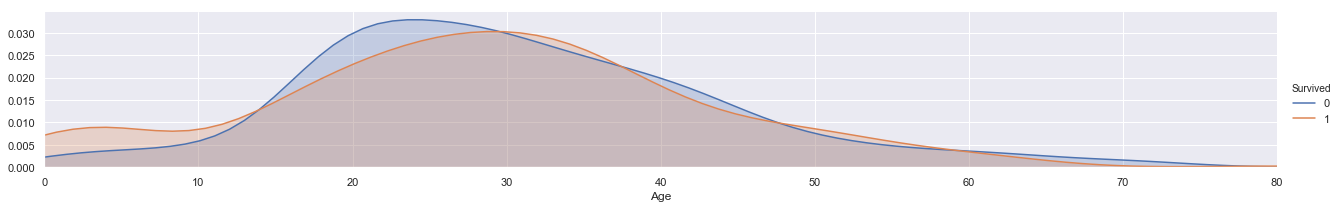

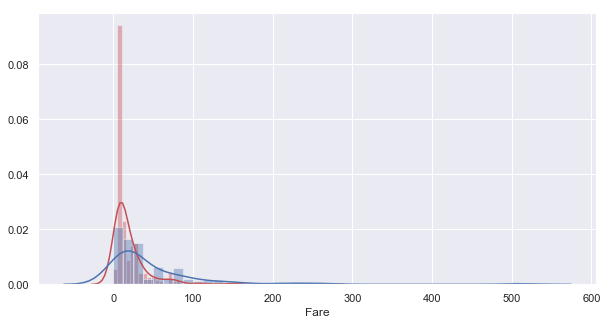

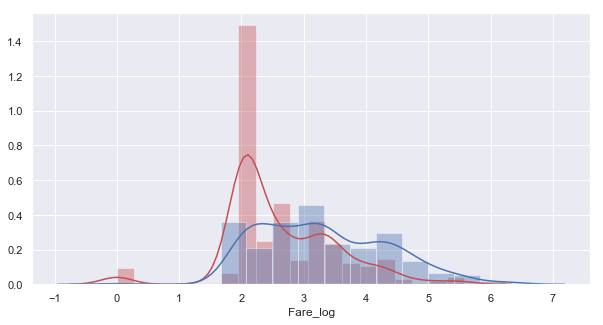

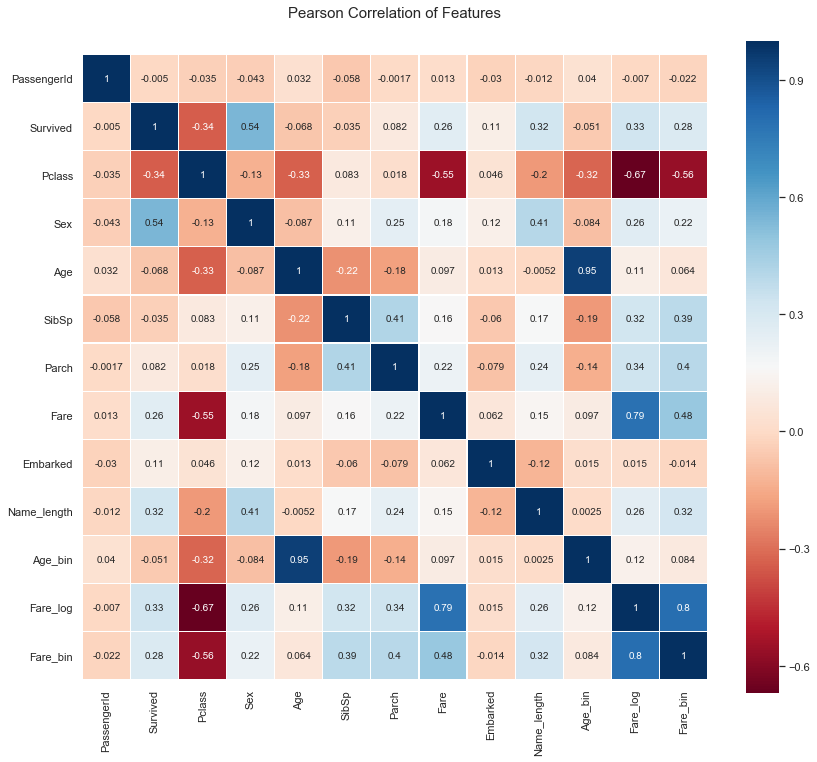

In [1]:
%run Preparing_the_Titanic_dataset

# K-Nearest Neighbors (KNN)

# What is KNN ?

Let’s first start by establishing some definitions and notations. We will use $x$ to denote a *feature* (aka. predictor, attribute) and $y$ to denote the *target* (aka. label, class) we are trying to predict.

KNN falls in the **supervised learning** family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations $(x,y)$ and would like to capture the relationship between $x$ and $y$. More formally, our goal is to learn a function $h:X→Y$ so that given an unseen observation $x, h(x)$ can confidently predict the corresponding output $y$.

## Introduction

In the classification setting, the K-nearest neighbor algorithm essentially boils down to forming a majority vote between the K most similar instances to a given “unseen” observation. Similarity is defined according to a distance metric between two data points. Instances given as $x = <a_1(x),a_2(x),...,a_n(x)>$ are represented as points in the n-dimensional space $\mathbb{R}^n$. Their relationships\distances can be formulated as:

\begin{equation}
d(x_i,x_j) \equiv \sqrt{\sum_{r=1}^{n} (a_r(x_i) - a_r(x_j))^2}
\end{equation}

In this case the distance metric is chosen to be the Euclidean distance, that is a popular choice. Other distance metrics may be more suitable for a given setting, including the Manhatten, Chebyshev and Hamming distance. 

A function $h$ is then learned from $\mathbb{R}^n$ $\rightarrow$ $V$, $V$ being a finite set of all possible classes. 

### Algorithm

For every given instance $x_i$ add it to the list of training_examples. 

**Inference:**

A new instance $x_q$ needs to be classified and $x_1,...,x_k$ are the $k$ closest instances to $x_q$ (known after computing all distances between training examples and the new instance). Note that $K$ is usually odd to prevent tie situations.
Then the new classification of $x_q$ is given by:

\begin{equation}
h(x_q) \leftarrow arg\max_{v \in V}\sum_{i=1}^{k}\delta (v,y_i)
\end{equation}

with 
\begin{equation}
\delta (a,b) = \begin{cases}
1, \text{if } a=b \\
0, else
\end{cases}
\end{equation}
 
### Example: 

Classification with $K=5$:

<img src="knn_5.png" width="800">

__$\rightarrow$The new instance is classified as a square.__

Classification with $K=1$:
<img src="knn_1.png" width="800">

__$\rightarrow$The new instance is classified as a triangle.__ 




If $k = 1$ the decision boundaries will end up being the same as in a [Voronoi](https://en.wikipedia.org/wiki/Voronoi_diagram) diagram. Whereas using circles the perspective is to find the next K nearest points to the new instance, a Voronoi shows regions, in which new instances are assigned to the known data points. (The perspective is now on the squares and triangles that will assign new points next to them to their class.)

Additional Information:

- In general it is often useful to normalize the input vectors so that input dimensions are not skewed so much.

- There is the possibility to use distance based weights for instances rather than uniformly taking known instances into consideration. Therefore the equation given above changes to:

    \begin{equation}
    f(x_q) \leftarrow arg\max_{v \in V}\sum_{i=1}^{k} w_i \delta (v,c(x_i))
    \end{equation}

    and the weights are given by:

    \begin{equation}
     w_i \equiv \frac{1}{d(x_q,x_i)^2}
    \end{equation}
    
- __Cover and Hart 1967__: As $n \rightarrow \infty$, the 1-NN error is no more than twice the error of the Bayes Optimal classifier.(Similar guarantees hold for k>1.) [Source](http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html)

- __Curse of dimensionality__: The inductive bias the K-NN algorithm makes is, that similar points share labels. In high dimensional spaces this assumption holds not as good as lower dimensional spaces. This is because, points are not close to each other if drawn uniformly in every dimension. See also: [Source](http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html)

- Reduce high dimensional data by PCA or SVD, intrinsic dimensions of the data should be lower dimensional or do not make use of all dimensions the data is given in

- K-NN algorithm becomes slow as n or the dimensions d increase, not feasible inference time

- K-NN algorithm becomes more accurate as n increases

In [2]:
train.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Name_length,Fare_log,Fare_bin
0,0,3,0,22,0,7.2500,0,1.981001,0
1,1,1,1,38,0,71.2833,3,4.266662,1
2,1,3,1,26,0,7.9250,0,2.070022,0
3,1,1,1,35,0,53.1000,3,3.972177,1
4,0,3,0,35,0,8.0500,1,2.085672,0


In [3]:
# Prepare the dataset and divide into training and test set, validation set is dealt with by
# the GridSearchCV lib
# STUDENT CODE HERE
from sklearn.model_selection import train_test_split

all_train=train.drop(labels='Survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(all_train, train['Survived'], test_size=0.3, random_state=17)
# STUDENT CODE until HERE

In [21]:
# Normalize the data
# STUDENT CODE HERE
from sklearn import preprocessing



x_train=preprocessing.normalize(X_train)
x_test=preprocessing.normalize(X_test)

#keep column and index name

#version1
x_train = pd.DataFrame(x_train, index=X_train.index, columns=X_train.columns)
x_test=pd.DataFrame(x_test, index=X_test.index, columns=X_test.columns)

#version2
#scaled_values=preprocessing.normalize(X_train)
#X_train.loc[:,:] = scaled_values

print(x_train)
x_test.head()
# STUDENT CODE until HERE

       Pclass       Sex       Age     Parch      Fare  Name_length  Fare_log  \
66   0.064456  0.032228  0.934619  0.000000  0.338397     0.032228  0.075781   
381  0.181769  0.060590  0.060590  0.121179  0.953783     0.060590  0.167004   
223  0.075080  0.000000  0.976034  0.000000  0.197604     0.000000  0.051713   
629  0.085540  0.000000  0.969457  0.000000  0.220503     0.028513  0.058325   
337  0.007106  0.007106  0.291358  0.000000  0.955795     0.014213  0.034832   
419  0.112639  0.037546  0.375462  0.075092  0.906741     0.037546  0.119558   
467  0.016107  0.000000  0.901977  0.000000  0.427634     0.016107  0.052814   
481  0.046411  0.000000  0.997844  0.000000  0.000000     0.046411  0.000000   
753  0.122006  0.000000  0.935382  0.000000  0.321113     0.000000  0.084035   
314  0.039569  0.000000  0.850737  0.019785  0.519345     0.000000  0.064649   
429  0.090201  0.000000  0.962149  0.000000  0.242041     0.060134  0.062710   
156  0.164156  0.054719  0.875497  0.000

,Pclass,Sex,Age,Parch,Fare,Name_length,Fare_log,Fare_bin
890,0.090566,0.000000,0.966042,0.000000,0.233963,0.000000,0.061817,0.000000
498,0.006505,0.006505,0.162620,0.013010,0.985805,0.019514,0.032660,0.006505
664,0.137348,0.000000,0.915650,0.000000,0.362826,0.045783,0.094771,0.000000
261,0.093748,0.000000,0.093748,0.062498,0.980834,0.062498,0.107698,0.031249
716,0.004334,0.004334,0.164676,0.000000,0.986001,0.008667,0.023520,0.004334


In [5]:
x_train.shape

(623, 8)

In [6]:
# Import the necessary modules

from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from matplotlib.colors import ListedColormap
num_neighbors = 1
radius = 100

"The k-neighbors classification in KNeighborsClassifier is the most commonly used technique. The optimal choice of the value is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.

In cases where the data is not uniformly sampled, radius-based neighbors classification in RadiusNeighborsClassifier can be a better choice. The user specifies a fixed radius , such that points in sparser neighborhoods use fewer nearest neighbors for the classification. For high-dimensional parameter spaces, this method becomes less effective due to the so-called “curse of dimensionality”.

The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns uniform weights to each neighbor. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied to compute the weights." [Source](https://scikit-learn.org/stable/modules/neighbors.html)

In [7]:
neigh = KNeighborsClassifier(n_neighbors=num_neighbors)
neigh.fit(x_train, y_train)

neigh_r = RadiusNeighborsClassifier(radius)
neigh_r.fit(x_train, y_train)

print("Test score of K-Nearest Neighbor: %f" %neigh.score(x_test, y_test))
print("Test score of K-Nearest Neighbor with radius: %f" %neigh_r.score(x_test, y_test))

Test score of K-Nearest Neighbor: 0.697761
Test score of K-Nearest Neighbor with radius: 0.585821


## Optimization

In [8]:
from sklearn.model_selection import GridSearchCV

### Find the optimal number of neighbors for the Conventional Classifier

In [9]:
print(int(0.8*len(x_train)))

498


In [10]:
# Name it k_model with k_params, max_neighbors for max_neighbors 
# have a look on the printing code below 
# !k_params should be considered as a dictionary with the keys
# n_neighbors and weights, that has to be optimized !

# STUDENT CODE HERE

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

max_neighbors=int(0.8*len(x_train))
k_params = {'n_neighbors': np.arange(1,max_neighbors+1), 'weights': ['uniform', 'distance']}

kf=KFold(n_splits=5, random_state=17)

k_model = GridSearchCV(KNeighborsClassifier(), k_params, cv=kf, scoring='accuracy',n_jobs= -1)
k_model.fit( x_train,y_train)

# STUDENT CODE until HERE

GridSearchCV(cv=KFold(n_splits=5, random_state=17, shuffle=False),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  2...
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
       482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 4

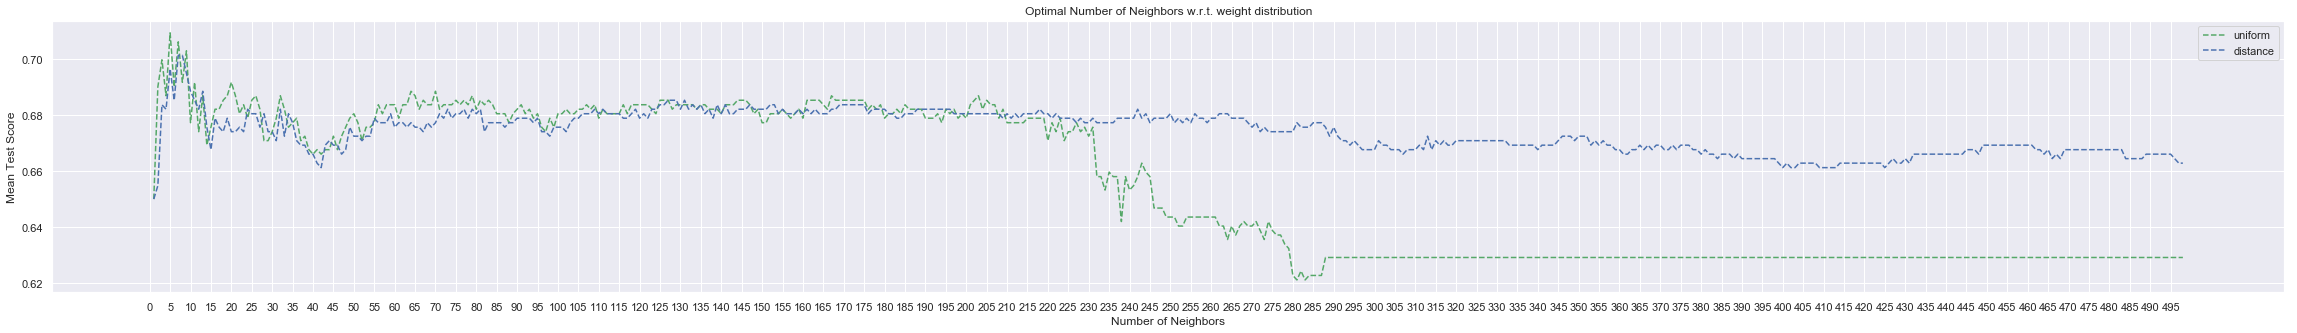

In [11]:

neighourhood = k_params['n_neighbors']
scores = k_model.cv_results_['mean_test_score']
scores_std = k_model.cv_results_['std_test_score']

# Resorting for plots
scores = np.append(scores[0::2], scores[1::2])
scores_std = np.append(scores_std[0::2], scores_std[1::2])

neighourhood = k_params['n_neighbors']

plt.figure().set_size_inches(40, 5)
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.xticks(np.arange(0,max_neighbors+1, 5))
plt.plot(neighourhood, scores[:max_neighbors],'g--',
        label='uniform')
plt.plot(neighourhood, scores[max_neighbors:]
         , 'b--',label='distance')
plt.title('Optimal Number of Neighbors w.r.t. weight distribution')
plt.legend()

### Get the best model

In [14]:
# Get the params, and the test score of the best model, print the values

# STUDENT CODE HERE


# Single best score achieved across all params (min_samples_split)
print(k_model.best_score_)

_

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(k_model.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(k_model.best_estimator_)


# STUDENT CODE until HERE

0.709470304975923
{'n_neighbors': 5, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


### Find the optimal radius for the RadiusClassifier

In [15]:
# Name it k_r_model, use k_r_params (look at next code block for consistency)
# + Give an outlier label of any number if not normalized

# STUDENT CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

neighourhood_r_start=1
neighourhood_r_stop=5

k_r_params = {'radius': np.arange(neighourhood_r_start,neighourhood_r_stop), 'weights': ['uniform', 'distance']}

kf=KFold(n_splits=5, random_state=17)

k_r_model = GridSearchCV(RadiusNeighborsClassifier(), k_r_params, cv=kf, scoring='accuracy',n_jobs= -1)
k_r_model.fit( x_train,y_train)

#if not normalized
#k_r_model.fit( X_train,y_train)
print("if not normalized samples[66,123] are outliers")
# STUDENT CODE until HERE

if not normalized samples[66,123] are outliers


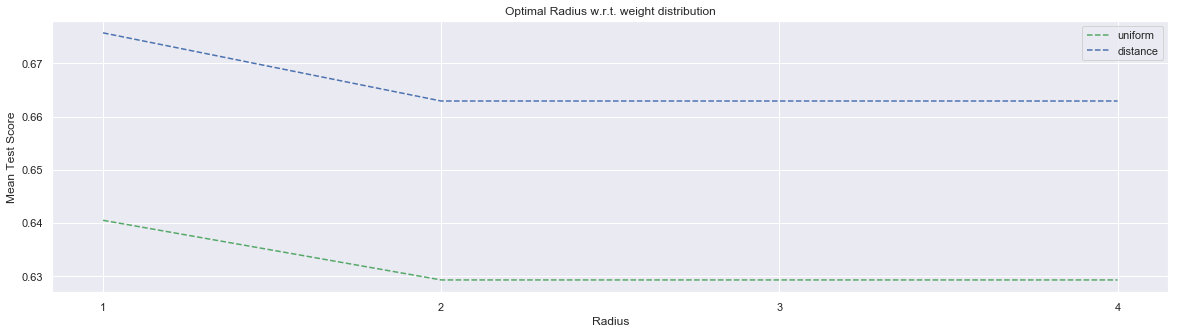

In [16]:

#
neighourhood_r = k_r_params['radius']
scores_r = k_r_model.cv_results_['mean_test_score']
scores_std_r = k_r_model.cv_results_['std_test_score']

scores_r = np.append(scores_r[0::2], scores_r[1::2]) #attach each 2 value
scores_std_r = np.append(scores_std_r[0::2], scores_std_r[1::2])

pseudo_max_radius = (neighourhood_r_stop - neighourhood_r_start)

plt.figure().set_size_inches(20, 5)
plt.title('Optimal Radius w.r.t. weight distribution')
plt.xlabel('Radius')
#plt.xticks(np.arange(0,radius+1, 5))
plt.xticks(np.arange(0,radius+1, 1))
plt.ylabel('Mean Test Score')
plt.plot(neighourhood_r, scores_r[:pseudo_max_radius],'g--',
        label='uniform')
plt.plot(neighourhood_r, scores_r[pseudo_max_radius:],'b--',
        label='distance')
plt.legend()

__Question: What happens if you take a radius of 0?__

Your answer: The model won't be able to detect any neighbors, therefore it won't lable the new instance if no lable for outliers has been set.

__Question: Can you imagine why the model doesnt improve by using a higher radius than 1?__

Your answer: Since the data is normalized all data is within a radius of 1.

### Get the best model

In [17]:
# Get the params, and the test score of the best model, print the values
# STUDENT CODE HERE
# Single best score achieved across all params (min_samples_split)
print(k_r_model.best_score_)

_

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(k_r_model.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(k_r_model.best_estimator_)
# STUDENT CODE until HERE

0.6757624398073836
{'radius': 1, 'weights': 'distance'}
RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                          metric_params=None, n_jobs=None, outlier_label=None,
                          p=2, radius=1, weights='distance')


## Compare

__Question: Which model would you take, radius or conventional Nearest Neighbor?__

Your answer:I will choose conventional Nearest Neighbor, because the dataset is dense. The radius Nearest Neighbor is not suitable. 

__Question: Are weights in both models uniform?__

Your answer:For the conventional model uniform weights were chosen as the best parameter, for the radius model distance weights were chosen.

## Visualization

We will take the two features of the training set and look where the decision boundaries are drawn for a KNN trained on them.

In [18]:
def plot_knn(n_neighbors,radius, X, y):
    
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    h = .2
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = KNeighborsClassifier(n_neighbors, weights=weights)
        clf_r = RadiusNeighborsClassifier(radius=radius, weights= weights, outlier_label=0)
        clf.fit(X, y)
        clf_r.fit(X,y)
        
        # Plot the decision boundary. For that, we will assign a color to each
        # creat point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),      #meshgrid convert vector to matrix
                             np.arange(y_min, y_max, h))      #np.c_ :concatenation
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])        #np.ravel() 2D to 1D
        Z2 = clf_r.predict(np.c_[xx.ravel(), yy.ravel()])
        
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        Z2 = Z2.reshape(xx.shape)
         
        f,ax = plt.subplots(1,2,figsize=(20,5))
        
        ax[0].pcolormesh(xx, yy, Z, cmap=cmap_light)
        ax[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                    edgecolor='k', s=20)
        ax[0].set_xlim(xx.min(), xx.max())
        ax[0].set_ylim(yy.min(), yy.max())
        ax[0].set_title("K-Nearest Neighbor with (k= %i, weights = '%s')"
                       % (n_neighbors, weights))
        
        ax[1].pcolormesh(xx, yy, Z2, cmap=cmap_light)
        ax[1].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                    edgecolor='k', s=20)
        ax[1].set_xlim(xx.min(), xx.max())
        ax[1].set_ylim(yy.min(), yy.max())
        ax[1].set_title("Radius Neighbors Classifier with (R= %i, weights = '%s')"
                       % (radius, weights))
        
    plt.show()


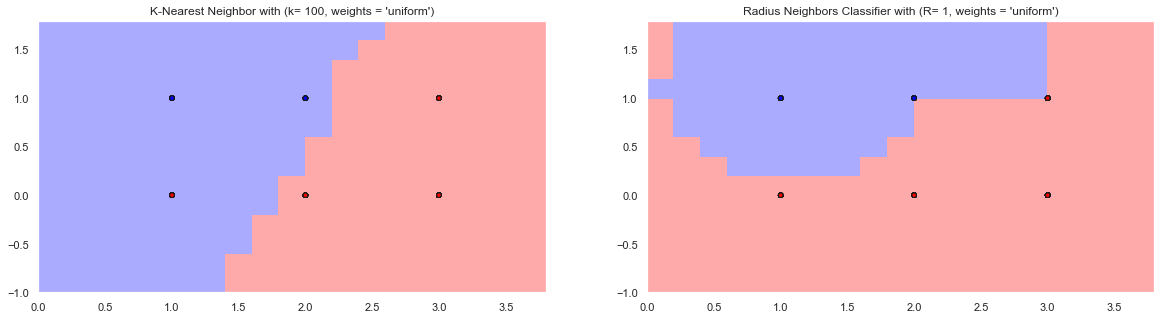

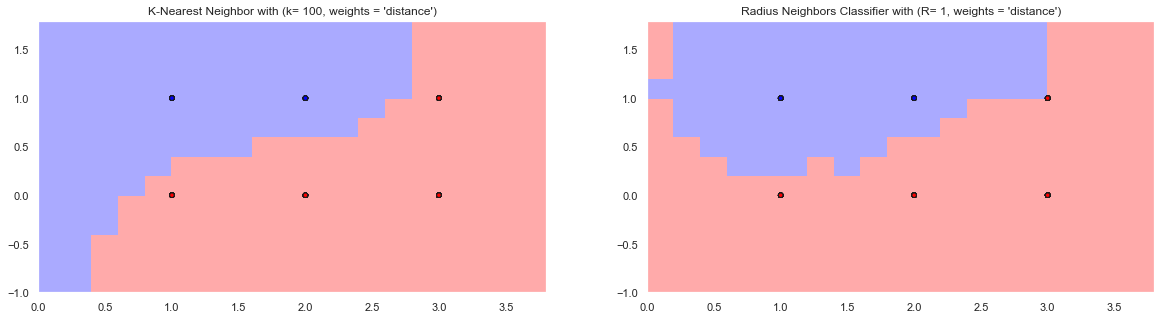

In [52]:
#plot_knn(2, 1, x_test.values[:,0:2], y_test.values)

plot_knn(100, 1, X_test.values[:,0:2], y_test.values)


__Question: Which features were compared in the default setting?__

Your answer: Pclass and Sex 

__Question: Why are there in the default setting only 6 points?__

Your answer: Because the Pclass has 3 classes and Sex has 2 classes.

__Question: Are previous determined optimal values for KNN and RNN reliable for these plots?__

Your answer: The previous determined optimal values aren't reliable here, because when we determined those values, we used normalized data and here we didn't. So we are basically working with two different datasets and therefore have to calculate seperate optimal values. This can also be seen, when we look at the plots. For the conventional model, the uniform weights were determined as optimal parameter. However in these plots, there are some errors for the conventional model with uniform weights.


__Question: What happens to the decision boundaries as you increase k? (The decision boundary smoothes out and becomes the mean label)__

Your answer: The decision boundary smoothes out and becomes the mean label

__Task:__ Plot continous features if possible.

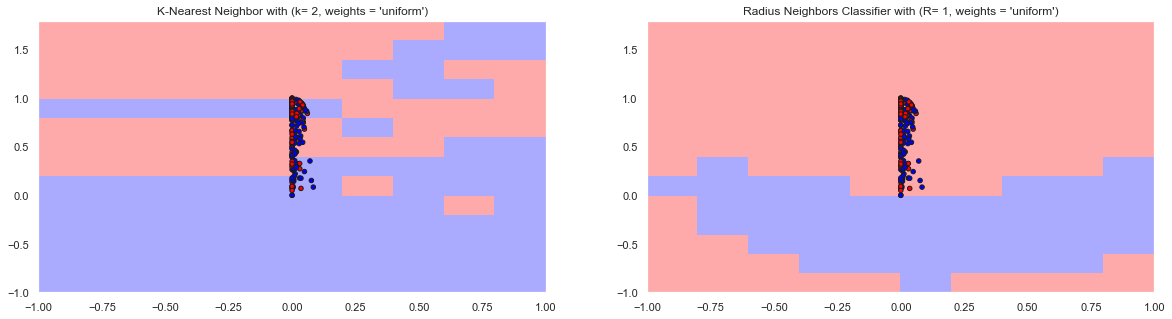

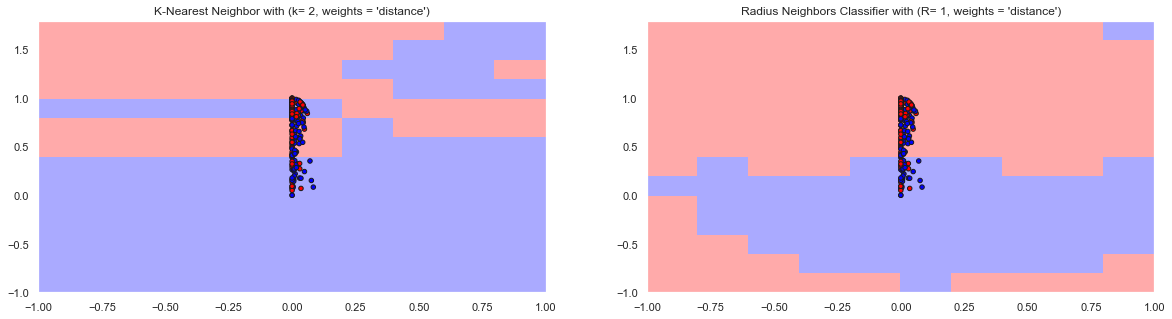

In [53]:
#plotting age over sex 
plot_knn(2, 1, x_test.values[:,1:3], y_test.values)

__Task:__ Leave out normalization. Is it a good idea not to normalize?


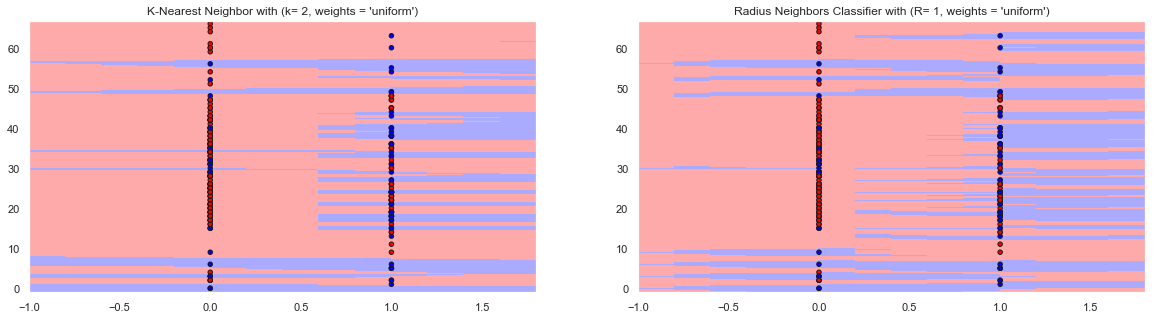

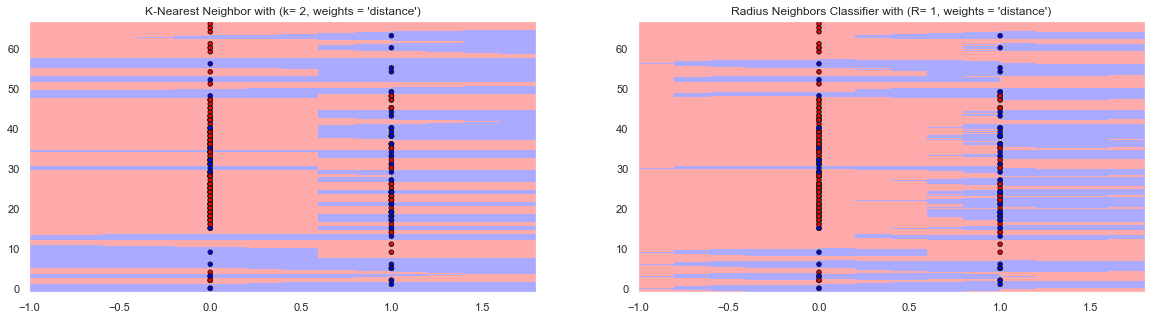

In [54]:
#plotting age over sex without normalization
plot_knn(2, 1, X_test.values[:,1:3], y_test.values)

We can see from the two plots above (Age over Sex) that lots of normalized data is falsely classified. The dataset shouldn't be normalized.

## Visualization by different methods

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

from pandas.plotting import parallel_coordinates

### Dimensionality Reduction with PCA

Can be used as well for preprocessing purposes also with K-NNs, but is only used for visualization purposes in here.

In [32]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(x_train))
# transformed_t = pd.DataFrame(pca.transform(x_test))

In [33]:
#transformed.head()
#print(y_train)

In [34]:

#change the format of y_train, resort the index of y_train

y_train_sort=pd.DataFrame(np.array(y_train))

#print(y_train_sort[0])

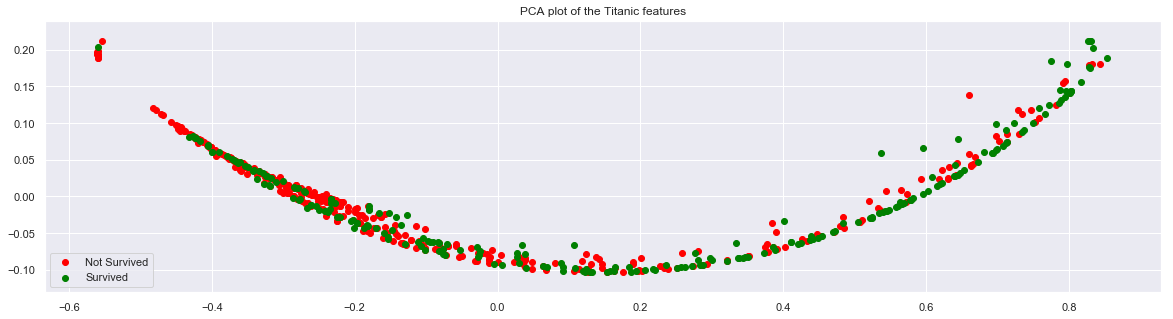

In [35]:


plt.figure(figsize=(20,5))
plt.scatter(transformed[y_train_sort[0]==0][0], transformed[y_train_sort[0]==0][1], label='Not Survived', c='red')
plt.scatter(transformed[y_train_sort[0]==1][0], transformed[y_train_sort[0]==1][1], label='Survived', c='green')
plt.title("PCA plot of the Titanic features")

plt.legend()
plt.show()

In [36]:
y_train.shape

x_train=pd.DataFrame(x_train)
x_train.shape
#print(y_train)

(623, 8)

### Parallel Coordinates



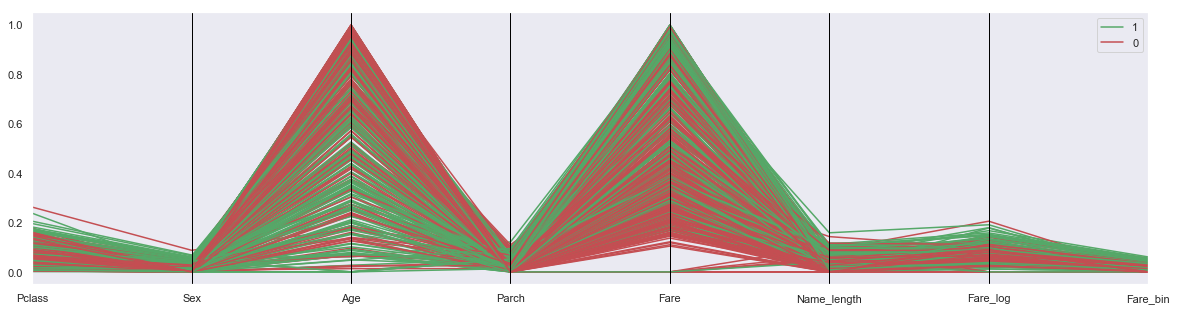

In [37]:

#original code:
data_norm = pd.concat([x_train, y_train], axis=1)

# Perform parallel coordinate plot
plt.figure(figsize=(20,5))
#parallel_coordinates(data_norm, 'Survived')
parallel_coordinates(data_norm, 'Survived', color=['g','r'])
plt.show()

__Question: What happens if the data is not normalized in these methods? Check by yourself.__

Your answer: The distribution of survival by ‘Fare' is more clear when the data is not normalized, however it makes it more difficult to evaluate all features in one plot. 

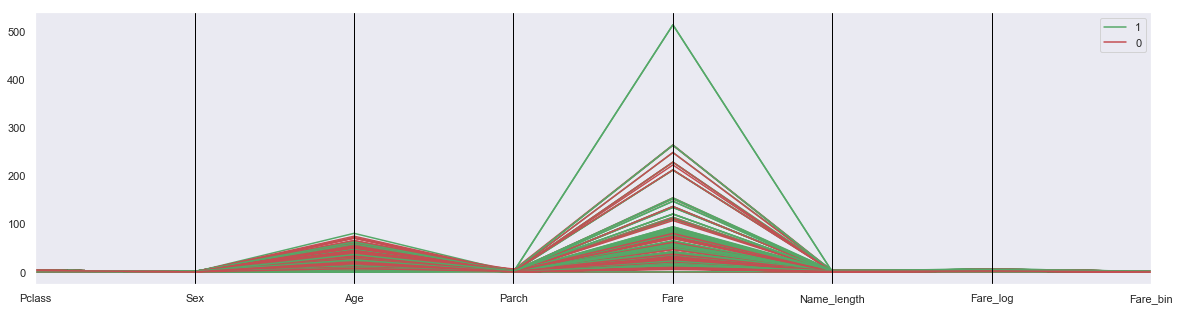

In [56]:
#without normalization
data_norm = pd.concat([X_train, y_train], axis=1)

# Perform parallel coordinate plot
plt.figure(figsize=(20,5))
#parallel_coordinates(data_norm, 'Survived')
parallel_coordinates(data_norm, 'Survived', color=['g','r'])
plt.show()

See also: http://www.apnorton.com/blog/2016/12/19/Visualizing-Multidimensional-Data-in-Python/

# Further Reading


- Bagging
- Logistic Regression
- Random Forests
- Combination of Bagging and GridSearchCV